## 1. Predicción del precio de una casa

> a) La función <i>read_csv</i> se encarga de obtener un archivo _csv_ a partir de la url entregada. Este archivo es representado como un _dataset_ el cual tiene 14 atributos. 
+ _CRIM_ : Corresponde a la tasa de crimen per cápita en el barrio.
+ <i>ZN</i> : Proporción de tierras residenciales divididas por lotes sobre 25.000 $ft^2$.
+ _INDUS_ : proporción de acres de negocios por barrio.
+ **_CHAS_** : _dummy variable_ que representa si la casa colinda con un tramo del Río Charles.
+ _NOX_ : Concentración de óxido de nitrógeno.
+ <i>RM</i> : Cantidad promedio de habitaciones por vivienda.
+ _AGE_ : Proporción de viviendas construidas antes de 1940 ocupadas por el propietario.
+ _DIS_ : Distancia media a cinco centros de empleo de Boston.
+ _RAD_ : Índice de accesibilidad a las autopistas radiales.
+ _TAX_ : Tasa de impuesto a la propiedad en unidades de 10.000 dolares.
+ _PTRATIO_ : Razón de alumnos/profesor por ciudad.
+ <i>B</i> : $1000(Bk - 0.63)^2$ donde $Bk$ es la proporción de gente de color por ciudad.
+ _LSTAT_ : Porcentaje de la pobación de bajos estratos sociales.
+ _MEDV_ : Mediana de los valores de las casas ocupadas por el dueño en unidades de miles de dolares.

> Además el atributo _CHAS_ de dos niveles es codificado como un vector binario con <i>get_dummies</i>. Esto hace que en vez de tener un sólo atriburo _CHAS_ se tengan dos: <i>CHAS_0</i> y <i>CHAS_1</i>, los cuales representan clases diferentes. La primera corresponde a las casas que no colindan con un tramo del río y la segunda a las casas que sí colindan con un tramo del río.
Por lo general codificar de esta manera cuando existe una gran cantidad de clases no es bueno, ya que incrementa la dimensionalidad del espacio (_fenomeno de Hughes_). Sin embargo, este no es el caso ya que la dimensionalidad a la que aumenta es insignificante.
Posteriormente se divide el _dataset_ entre ejemplos de entrenamiento y de prueba, correspondiendo a estos últimos un cuarto de la totalidad del _dataset_. 
Para finalizar se normalizan los datos.


In [24]:
import pandas as pd
url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df = pd.get_dummies(df,columns=["CHAS"]) #to categorical
from sklearn.cross_validation import train_test_split
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)
df.shape
df.info()
df.describe()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)
y_train = df_train.pop('MEDV').values.reshape(-1,1)
y_test = df_test.pop('MEDV').values.reshape(-1,1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
CRIM       506 non-null float64
ZN         506 non-null int64
INDUS      506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null int64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
CHAS_0     506 non-null uint8
CHAS_1     506 non-null uint8
dtypes: float64(9), int64(4), uint8(2)
memory usage: 52.5 KB


> b) 

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 2ms/step - loss: 103.2114 - val_loss: 42.5278
Epoch 2/300
379/379 [==============================] - 0s 138us/step - loss: 29.7043 - val_loss: 32.6629
Epoch 3/300
379/379 [==============================] - 0s 148us/step - loss: 23.6447 - val_loss: 26.2757
Epoch 4/300
379/379 [==============================] - 0s 143us/step - loss: 17.4440 - val_loss: 24.5455
Epoch 5/300
379/379 [==============================] - 0s 140us/step - loss: 15.7402 - val_loss: 24.8871
Epoch 6/300
379/379 [==============================] - 0s 135us/step - loss: 12.7149 - val_loss: 16.6234
Epoch 7/300
379/379 [==============================] - 0s 143us/step - loss: 10.7176 - val_loss: 14.6907
Epoch 8/300
379/379 [==============================] - 0s 131us/step - loss: 9.6947 - val_loss: 13.8149
Epoch 9/300
379/379 [==============================] - 0s 142us/step - loss: 9.3847 - val_loss: 13.2138
Epoch 10/300

379/379 [==============================] - 0s 120us/step - loss: 0.2121 - val_loss: 0.2079
Epoch 80/300
379/379 [==============================] - 0s 123us/step - loss: 0.2160 - val_loss: 0.2207
Epoch 81/300
379/379 [==============================] - 0s 128us/step - loss: 0.2162 - val_loss: 0.2320
Epoch 82/300
379/379 [==============================] - 0s 180us/step - loss: 0.2134 - val_loss: 0.2177
Epoch 83/300
379/379 [==============================] - 0s 205us/step - loss: 0.2139 - val_loss: 0.2339
Epoch 84/300
379/379 [==============================] - 0s 179us/step - loss: 0.2012 - val_loss: 0.1869
Epoch 85/300
379/379 [==============================] - 0s 153us/step - loss: 0.2032 - val_loss: 0.1987
Epoch 86/300
379/379 [==============================] - 0s 130us/step - loss: 0.1990 - val_loss: 0.2154
Epoch 87/300
379/379 [==============================] - 0s 115us/step - loss: 0.1999 - val_loss: 0.1884
Epoch 88/300
379/379 [==============================] - 0s 116us/step - loss:

379/379 [==============================] - 0s 130us/step - loss: 0.1357 - val_loss: 0.1276
Epoch 158/300
379/379 [==============================] - 0s 139us/step - loss: 0.1419 - val_loss: 0.1331
Epoch 159/300
379/379 [==============================] - 0s 128us/step - loss: 0.1415 - val_loss: 0.1368
Epoch 160/300
379/379 [==============================] - 0s 126us/step - loss: 0.1334 - val_loss: 0.1272
Epoch 161/300
379/379 [==============================] - 0s 134us/step - loss: 0.1301 - val_loss: 0.1277
Epoch 162/300
379/379 [==============================] - 0s 122us/step - loss: 0.1315 - val_loss: 0.1251
Epoch 163/300
379/379 [==============================] - 0s 128us/step - loss: 0.1353 - val_loss: 0.1381
Epoch 164/300
379/379 [==============================] - 0s 136us/step - loss: 0.1314 - val_loss: 0.1241
Epoch 165/300
379/379 [==============================] - 0s 116us/step - loss: 0.1310 - val_loss: 0.1221
Epoch 166/300
379/379 [==============================] - 0s 130us/ste

379/379 [==============================] - 0s 108us/step - loss: 0.1003 - val_loss: 0.1210
Epoch 236/300
379/379 [==============================] - 0s 108us/step - loss: 0.1017 - val_loss: 0.0991
Epoch 237/300
379/379 [==============================] - 0s 109us/step - loss: 0.1010 - val_loss: 0.1064
Epoch 238/300
379/379 [==============================] - 0s 159us/step - loss: 0.0996 - val_loss: 0.1024
Epoch 239/300
379/379 [==============================] - 0s 163us/step - loss: 0.0991 - val_loss: 0.1031
Epoch 240/300
379/379 [==============================] - 0s 168us/step - loss: 0.1045 - val_loss: 0.1100
Epoch 241/300
379/379 [==============================] - 0s 161us/step - loss: 0.0971 - val_loss: 0.1096
Epoch 242/300
379/379 [==============================] - 0s 117us/step - loss: 0.1015 - val_loss: 0.1017
Epoch 243/300
379/379 [==============================] - 0s 118us/step - loss: 0.0968 - val_loss: 0.1163
Epoch 244/300
379/379 [==============================] - 0s 103us/ste

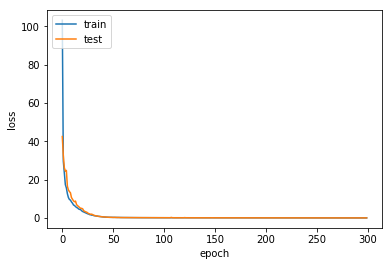

In [25]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
    verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

c)

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 2ms/step - loss: 260.2484 - val_loss: 37.4306
Epoch 2/300
379/379 [==============================] - 0s 172us/step - loss: 14.3706 - val_loss: 14.5936
Epoch 3/300
379/379 [==============================] - 0s 172us/step - loss: 6.7365 - val_loss: 6.9241
Epoch 4/300
379/379 [==============================] - 0s 130us/step - loss: 3.5529 - val_loss: 6.3419
Epoch 5/300
379/379 [==============================] - 0s 147us/step - loss: 2.4880 - val_loss: 3.2440
Epoch 6/300
379/379 [==============================] - 0s 172us/step - loss: 1.7552 - val_loss: 2.5355
Epoch 7/300
379/379 [==============================] - 0s 131us/step - loss: 1.4912 - val_loss: 2.2974
Epoch 8/300
379/379 [==============================] - 0s 185us/step - loss: 1.5219 - val_loss: 1.9791
Epoch 9/300
379/379 [==============================] - 0s 152us/step - loss: 1.1048 - val_loss: 1.6594
Epoch 10/300
379/379 [==

379/379 [==============================] - 0s 146us/step - loss: 0.1157 - val_loss: 1.1223
Epoch 80/300
379/379 [==============================] - 0s 139us/step - loss: 0.8935 - val_loss: 0.4993
Epoch 81/300
379/379 [==============================] - 0s 168us/step - loss: 0.0680 - val_loss: 0.1197
Epoch 82/300
379/379 [==============================] - 0s 144us/step - loss: 0.1345 - val_loss: 0.1334
Epoch 83/300
379/379 [==============================] - 0s 132us/step - loss: 0.1225 - val_loss: 0.1996
Epoch 84/300
379/379 [==============================] - 0s 126us/step - loss: 0.0629 - val_loss: 0.1371
Epoch 85/300
379/379 [==============================] - 0s 130us/step - loss: 0.1517 - val_loss: 0.1390
Epoch 86/300
379/379 [==============================] - 0s 126us/step - loss: 0.0417 - val_loss: 0.1148
Epoch 87/300
379/379 [==============================] - 0s 142us/step - loss: 0.0438 - val_loss: 0.1173
Epoch 88/300
379/379 [==============================] - 0s 120us/step - loss:

379/379 [==============================] - 0s 144us/step - loss: 0.0221 - val_loss: 0.0605
Epoch 158/300
379/379 [==============================] - 0s 152us/step - loss: 0.0269 - val_loss: 0.0998
Epoch 159/300
379/379 [==============================] - 0s 130us/step - loss: 0.0376 - val_loss: 0.0586
Epoch 160/300
379/379 [==============================] - 0s 130us/step - loss: 0.0205 - val_loss: 0.0990
Epoch 161/300
379/379 [==============================] - 0s 119us/step - loss: 0.0480 - val_loss: 0.0605
Epoch 162/300
379/379 [==============================] - 0s 116us/step - loss: 0.0165 - val_loss: 0.0841
Epoch 163/300
379/379 [==============================] - 0s 146us/step - loss: 0.0336 - val_loss: 0.0693
Epoch 164/300
379/379 [==============================] - 0s 143us/step - loss: 0.0183 - val_loss: 0.0662
Epoch 165/300
379/379 [==============================] - 0s 134us/step - loss: 0.0328 - val_loss: 0.0998
Epoch 166/300
379/379 [==============================] - 0s 134us/ste

379/379 [==============================] - 0s 151us/step - loss: 0.0080 - val_loss: 0.0425
Epoch 236/300
379/379 [==============================] - 0s 138us/step - loss: 0.0084 - val_loss: 0.0432
Epoch 237/300
379/379 [==============================] - 0s 120us/step - loss: 0.0095 - val_loss: 0.0534
Epoch 238/300
379/379 [==============================] - 0s 132us/step - loss: 0.0170 - val_loss: 0.0428
Epoch 239/300
379/379 [==============================] - 0s 130us/step - loss: 0.0165 - val_loss: 0.0473
Epoch 240/300
379/379 [==============================] - 0s 128us/step - loss: 0.0125 - val_loss: 0.0407
Epoch 241/300
379/379 [==============================] - 0s 148us/step - loss: 0.0100 - val_loss: 0.0549
Epoch 242/300
379/379 [==============================] - 0s 148us/step - loss: 0.0181 - val_loss: 0.0426
Epoch 243/300
379/379 [==============================] - 0s 147us/step - loss: 0.0137 - val_loss: 0.0420
Epoch 244/300
379/379 [==============================] - 0s 146us/ste

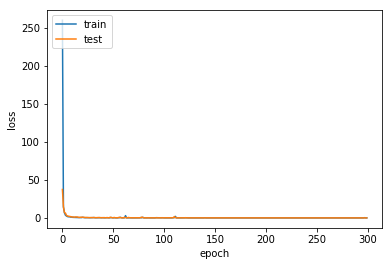

In [27]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
    verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

d)

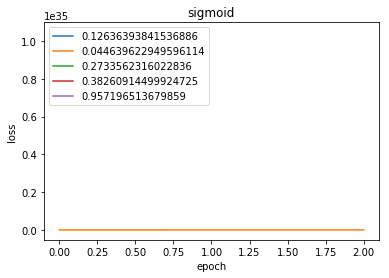

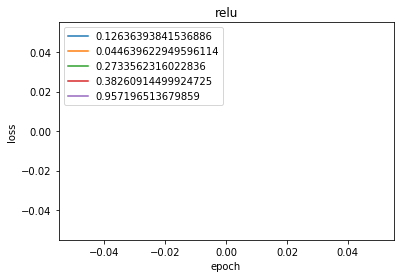

In [59]:
import numpy as np
n_lr = 5
learn_rate = np.random.uniform(0.0, 1.0, n_lr)

funciones = ['sigmoid', 'relu']
for func in funciones:
    for valor in np.nditer(learn_rate):
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
        model.add(Activation(func))
        model.add(Dense(1, kernel_initializer='uniform'))
        model.add(Activation('linear'))
        sgd = SGD(lr=valor)
        model.compile(optimizer=sgd,loss='mean_squared_error')
        hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
            verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))
        plt.plot(hist.history['loss'])

    plt.title(func)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend([str(i) for i in learn_rate.tolist()], loc='upper left')
    plt.show()

e)

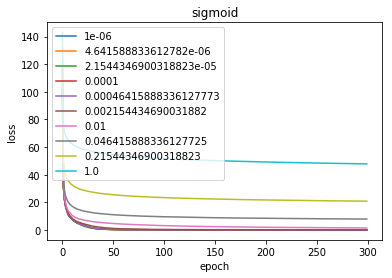

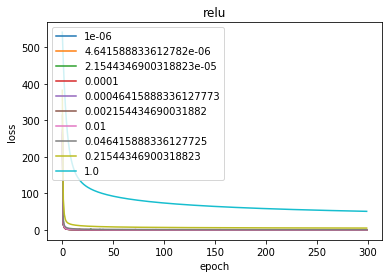

In [55]:
n_decay = 10
learn_decay = np.logspace(-6,0,n_decay)

funciones = ['sigmoid', 'relu']
for func in funciones:
    for valor in np.nditer(learn_decay):
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
        model.add(Activation(func))
        model.add(Dense(1, kernel_initializer='uniform'))
        model.add(Activation('linear'))
        sgd = SGD(lr=0.01, decay=valor)
        model.compile(optimizer=sgd,loss='mean_squared_error')
        hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
            verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))
        plt.plot(hist.history['loss'])

    plt.title(func)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend([str(i) for i in learn_decay.tolist()], loc='upper left')
    plt.show()

f)

In [ ]:
n_batches = 21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')


hist = model.fit(X_train_scaled.as_matrix(),y_train.as_matrix(),batch_size=50,epochs=300)

hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
    verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()